In [34]:
a = [1,2,3,4]
b = a.copy()
b.remove(3)
print(a)
print(b)

[1, 2, 3, 4]
[1, 2, 4]


In [35]:
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt

In [36]:
start_day = datetime(2019, 1, 1)
#end_day = datetime.now().date()
end_day = datetime(2020, 12, 31)
company_code = '005930.KS' # KS: kospi

df = pdr.data.get_data_yahoo(company_code, start_day, end_day)

               High           Low          Open         Close        Volume  \
count    493.000000    493.000000    493.000000    493.000000  4.930000e+02   
mean   52429.817444  51330.223124  51875.456389  51895.131846  1.635268e+07   
std     7835.434118   7645.775000   7696.538397   7759.467508  8.946890e+06   
min    37600.000000  36850.000000  37450.000000  37450.000000  0.000000e+00   
25%    46350.000000  45350.000000  45950.000000  45850.000000  9.739982e+06   
50%    50900.000000  49900.000000  50300.000000  50300.000000  1.442888e+07   
75%    57600.000000  56300.000000  57000.000000  56800.000000  2.022328e+07   
max    81300.000000  78200.000000  79000.000000  81000.000000  5.946293e+07   

          Adj Close  
count    493.000000  
mean   49556.823529  
std     8117.873112  
min    34769.980469  
25%    42893.804688  
50%    48056.101562  
75%    54776.023438  
max    81000.000000  


<AxesSubplot:xlabel='Date'>

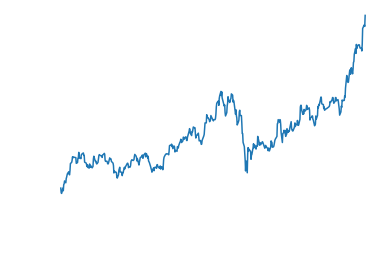

In [37]:
print(df.describe())
df['Close'].plot()
#plt.show()

In [38]:
list(df.keys())

['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

In [42]:
data = {}
data['date'] = list(df.index.values)
for key in df.keys():
    data[key] = list(df[key].values)
print(data.keys())

dict_keys(['date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])


# 전략 1
### 매주 1주씩 매수

In [45]:
num_stock = 0 # 구매한 주식의 개수
cost = 0 # 주식 구매에 든 총 비용
stock_value = 0  # 구매한 주식의 총 가치

for high in data['High']:
    num_stock += 1
    cost += high # 고가에 샀다고 가정
stock_value = num_stock * data['Close'][-1]

print("""주식 총 가치 : {:0.0f}원
총 비용 : {:0.0f}원
수익률  : {:0.2f}%%
""".format(stock_value, cost, 100 * stock_value / cost - 100))

주식 총 가치 : 39933000원
총 비용 : 25847900원
수익률  : 54.49%%



# 전략 2
### 매주 1주씩 매입하고 평균단가 이하이면 2주, 평균단가 초과면 1주 매입

In [48]:
num_stock = 0 # 구매한 주식의 개수
cost = 0 # 주식 구매에 든 총 비용
stock_value = 0  # 구매한 주식의 총 가치
mean_cost = 0

for i in range(len(data['date'])):
    if i == 0 or mean_cost < data['Low'][i]:
        num_stock += 1
        cost += data['High'][i]
    else:
        num_stock += 2
        cost += 2 * data['High'][i]
    mean_cost = cost / num_stock
stock_value = num_stock * data['Close'][i]

print("""주식 총 가치 : {:0.0f}원
총 비용 : {:0.0f}원
수익률  : {:0.2f}%%
""".format(stock_value, cost, 100 * stock_value / cost - 100))

주식 총 가치 : 47061000원
총 비용 : 29783000원
수익률  : 58.01%%



# 전략 3
### 매주 10만원씩 매수

In [50]:
num_stock = 0 # 구매한 주식의 개수
cash = int(1e5)
cost = 0 # 주식 구매에 든 총 비용
stock_value = 0  # 구매한 주식의 총 가치

for i in range(len(data['date'])):
    num_buy = cash//data['High'][i]
    num_stock += num_buy
    current_price = data['High'][i]
    cost += num_buy * current_price
    cash += int(1e5) - num_buy * current_price
stock_value = num_stock * data['Close'][i]

print("""주식 총 가치 : {:0.0f}원
총 비용 : {:0.0f}원
수익률  : {:0.2f}%%
""".format(stock_value, cost, 100 * stock_value / cost - 100))

주식 총 가치 : 77679000원
총 비용 : 49279650원
수익률  : 57.63%%

